<a href="https://colab.research.google.com/github/Arjun-A-Pathak/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>




## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('//content/drive/MyDrive/SeoulBikeData.csv',encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

##Data cleaning

In [7]:
#Replacing space between columns name with underscore
df.columns = df.columns.str.replace(' ','_')


In [8]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)', 'Seasons',
       'Holiday', 'Functioning_Day'],
      dtype='object')

###checking for duplicate

In [9]:
len(df[df.duplicated()])

0

###checking for null values

In [10]:
df.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind_speed_(m/s)             0
Visibility_(10m)             0
Dew_point_temperature(°C)    0
Solar_Radiation_(MJ/m2)      0
Rainfall(mm)                 0
Snowfall_(cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

In [11]:
#checking unique value in season column
season = df['Seasons'].unique()
season

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [12]:
season_cate = {}
for i, j in enumerate(season):
  season_cate[j] = i

season_cate  

{'Autumn': 3, 'Spring': 1, 'Summer': 2, 'Winter': 0}

In [13]:
df['Seasons'] = df['Seasons'].map(season_cate)

In [14]:
hol_cat = {'No Holiday' : 0, 'Holiday' : 1}

In [15]:
func_day_cat = {'No' : 0, 'Yes' : 1}

In [16]:
df['Holiday'] = df['Holiday'].map(hol_cat)
df['Functioning_Day'] = df['Functioning_Day'].map(func_day_cat)

In [17]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1


In [18]:
df.describe()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.504110,0.049315,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

##Explotary data analysis

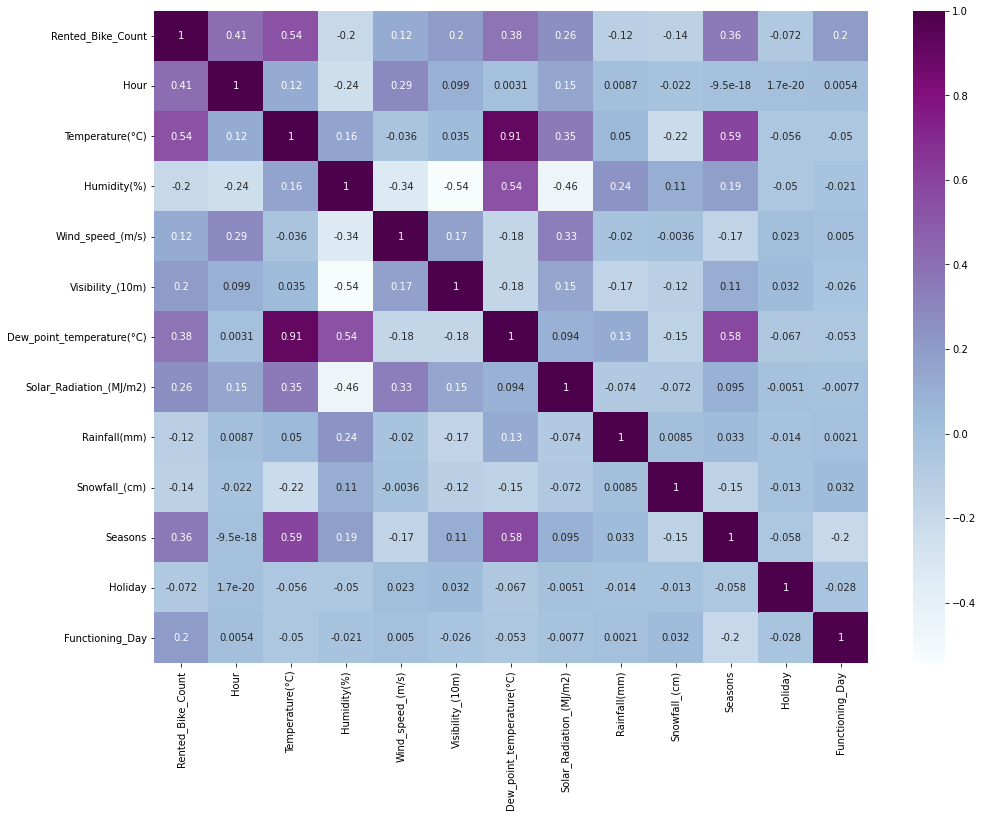

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.savefig('heatmap.jpg')

In [21]:
df.groupby(['Seasons','Holiday'])['Rented_Bike_Count'].mean()

Seasons  Holiday
0        0           232.264736
         1           156.625000
1        0           733.224251
         1           635.305556
2        0          1034.338426
         1          1022.145833
3        0           823.151163
         1           758.483333
Name: Rented_Bike_Count, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented_Bike_Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind_speed_(m/s)           8760 non-null   float64       
 6   Visibility_(10m)           8760 non-null   int64         
 7   Dew_point_temperature(°C)  8760 non-null   float64       
 8   Solar_Radiation_(MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall_(cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   int64         
 12  Holida

In [23]:
import datetime
year = df['Date'].map(lambda d: '01-01-%d' % d.year).astype('datetime64')

In [24]:
year

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
8755   2018-01-01
8756   2018-01-01
8757   2018-01-01
8758   2018-01-01
8759   2018-01-01
Name: Date, Length: 8760, dtype: datetime64[ns]

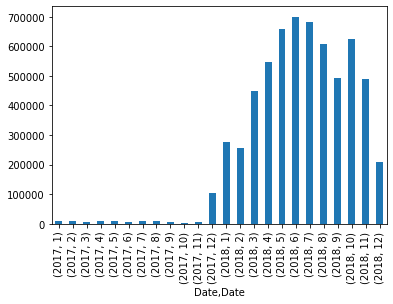

In [25]:
df.groupby([pd.DatetimeIndex(df['Date']).year,
                pd.DatetimeIndex(df['Date']).month])['Rented_Bike_Count'].sum().plot(kind = 'bar')

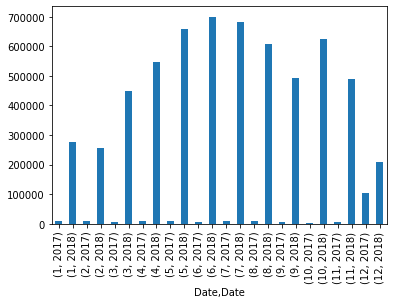

In [26]:
df.groupby([pd.DatetimeIndex(df['Date']).month,
                pd.DatetimeIndex(df['Date']).year])['Rented_Bike_Count'].sum().plot(kind = 'bar')

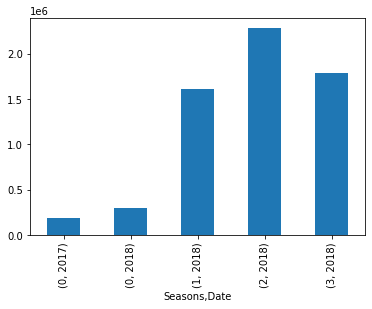

In [27]:
df.groupby(['Seasons',
               pd.DatetimeIndex(df['Date']).year])['Rented_Bike_Count'].sum().plot(kind = 'bar')

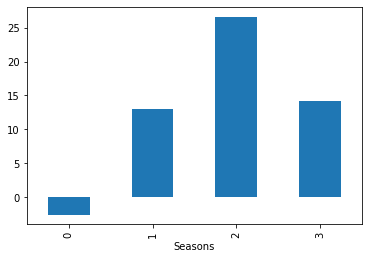

In [28]:
df.groupby('Seasons')['Temperature(°C)'].mean().plot(kind = 'bar')
plt.show()
plt.close()

In [29]:
day_name = []
for i in df['Date']:
  day_name.append(i.strftime('%A'))

df['Day_name'] = day_name

In [30]:
df['Weekdays'] = np.where(df['Day_name'].values == ['Friday','Saturday'], 0,1)

In [31]:
df['Day_name'] == 'Sunday'

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: Day_name, Length: 8760, dtype: bool

In [32]:
week_num = {'Sunday': 1,
            'Monday': 2,
            'Tuesday': 3,
            'Wednesday': 4,
            'Thursday': 5,
            'Friday': 6,
            'Saturday': 7}

df['Day_num'] = df['Day_name'].map(week_num)

In [33]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Day_name,Weekdays,Day_num
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,Thursday,1,5
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,Thursday,1,5
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,Thursday,1,5
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,Thursday,1,5
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,Thursday,1,5


In [34]:
df.drop(['Day_name'], axis = 1, inplace = True)


In [35]:
#df['Day_num'].unique()

In [36]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [37]:
df.drop('Date', axis = 1, inplace = True)

In [38]:
df.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Weekdays,Day_num,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,5,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,5,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,5,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,5,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,5,12,1,2017


In [39]:
df['Snowfall_(cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [40]:
df['Solar_Radiation_(MJ/m2)'].unique()

array([0.  , 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01, 0.54, 0.24, 0.08,
       0.3 , 0.8 , 1.  , 1.09, 1.12, 0.99, 0.74, 0.22, 0.06, 0.02, 0.25,
       0.43, 0.6 , 0.69, 0.53, 0.2 , 0.05, 0.64, 1.17, 0.88, 0.55, 0.18,
       0.21, 0.63, 0.93, 1.08, 1.1 , 0.96, 0.72, 0.36, 0.1 , 0.14, 0.41,
       0.98, 1.14, 1.04, 0.84, 0.51, 0.15, 1.22, 0.87, 0.56, 0.61, 0.89,
       1.05, 1.13, 1.06, 0.4 , 0.03, 0.28, 0.35, 0.62, 1.26, 1.24, 0.92,
       0.58, 0.19, 1.23, 0.13, 0.52, 0.48, 0.09, 0.34, 0.42, 0.32, 0.86,
       1.07, 0.17, 0.85, 0.47, 0.57, 0.91, 0.71, 0.12, 0.67, 0.77, 0.78,
       0.16, 0.66, 0.38, 0.11, 0.04, 0.07, 1.18, 0.9 , 0.33, 0.75, 0.59,
       0.29, 0.81, 0.83, 0.39, 1.15, 1.03, 0.95, 0.76, 1.02, 0.26, 0.5 ,
       0.27, 0.73, 0.46, 0.31, 1.2 , 1.19, 0.45, 0.49, 0.79, 0.44, 0.68,
       1.27, 1.25, 1.21, 0.7 , 1.28, 1.3 , 1.29, 0.82, 1.65, 2.04, 2.25,
       2.18, 1.91, 1.42, 1.57, 1.99, 2.22, 2.17, 1.89, 1.4 , 1.73, 2.12,
       2.29, 2.23, 1.94, 1.44, 1.72, 2.09, 2.3 , 2.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented_Bike_Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind_speed_(m/s)           8760 non-null   float64
 5   Visibility_(10m)           8760 non-null   int64  
 6   Dew_point_temperature(°C)  8760 non-null   float64
 7   Solar_Radiation_(MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall_(cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   int64  
 11  Holiday                    8760 non-null   int64  
 12  Functioning_Day            8760 non-null   int64  
 13  Weekdays                   8760 non-null   int64

In [42]:
df.corr()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Weekdays,Day_num,Day,Month,Year
Rented_Bike_Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,0.203943,NaN,4.953460e-02,4.684885e-02,7.086107e-02,0.215162
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-9.516382e-18,1.691160e-20,0.005439,NaN,-1.094508e-17,1.598551e-19,2.684858e-18,0.000000
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,-0.050170,NaN,6.603053e-03,8.090791e-02,4.968327e-02,0.377796
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,-0.020800,NaN,-4.653905e-03,7.047359e-03,4.779778e-02,0.035925
Wind_speed_(m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,0.005037,NaN,2.158618e-02,-6.123440e-02,-8.206909e-02,-0.003781
Visibility_(10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,-0.026000,NaN,3.876812e-02,-1.068595e-01,7.788783e-02,0.052381
Dew_point_temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,-0.052837,NaN,8.023148e-04,6.970777e-02,6.510073e-02,0.336350
Solar_Radiation_(MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,-0.007665,NaN,1.911955e-02,-3.445555e-03,-3.041240e-02,0.128086
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,0.002055,NaN,-1.230032e-02,1.199827e-02,-2.279368e-02,0.027522
Snowfall_(cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,0.032089,NaN,6.581537e-03,1.014355e-01,5.475846e-02,-0.206418


In [43]:
df.cov()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Weekdays,Day_num,Day,Month,Year
Rented_Bike_Count,416021.733390,1.831818e+03,4149.257754,-2623.853782,80.950203,78187.849382,3199.299111,146.717508,-89.558657,-39.946114,2.585394e+02,-1.010310e+01,23.730746,0.0,6.396715e+01,2.658148e+02,1.575938e+02,38.690938
Hour,1831.818358,4.792214e+01,10.262907,-34.062222,2.045964,415.850668,0.276150,0.872813,0.068061,-0.065053,-8.112144e-18,-3.042054e-19,0.006793,0.0,-7.787659e-17,1.817120e-16,1.946915e-17,0.000000
Temperature(°C),4149.257754,1.026291e+01,142.678850,38.763038,-0.448739,252.817084,142.400017,3.668334,0.677602,-1.139387,7.874302e+00,-1.446652e-01,-0.108110,0.0,1.579119e-01,8.501449e+00,2.046272e+00,1.258122
Humidity(%),-2623.853782,-3.406222e+01,38.763038,414.627875,-7.104540,-6726.950421,142.782065,-8.171237,5.430677,0.962098,4.294195e+00,-2.216854e-01,-0.076408,0.0,-1.897305e-01,1.262344e+00,3.355910e+00,0.203943
Wind_speed_(m/s),80.950203,2.045964e+00,-0.448739,-7.104540,1.073918,108.114660,-2.388639,0.299140,-0.023002,-0.001609,-1.926700e-01,5.164911e-03,0.000942,0.0,4.478697e-02,-5.582171e-01,-2.932503e-01,-0.001092
Visibility_(10m),78187.849382,4.158507e+02,252.817084,-6726.950421,108.114660,370027.323001,-1403.253586,79.130141,-115.040313,-32.330842,7.590653e+01,4.185096e+00,-2.853224,0.0,4.721522e+01,-5.718104e+02,1.633653e+02,8.883365
Dew_point_temperature(°C),3199.299111,2.761502e-01,142.400017,142.782065,-2.388639,-1403.253586,170.573247,1.070865,1.850620,-0.860668,8.476852e+00,-1.887986e-01,-0.124492,0.0,2.097928e-02,8.008642e+00,2.931667e+00,1.224708
Solar_Radiation_(MJ/m2),146.717508,8.728125e-01,3.668334,-8.171237,0.299140,79.130141,1.070865,0.754720,-0.072813,-0.027432,9.166423e-02,-9.551131e-04,-0.001201,0.0,3.325531e-02,-2.633142e-02,-9.109970e-02,0.031023
Rainfall(mm),-89.558657,6.806142e-02,0.677602,5.430677,-0.023002,-115.040313,1.850620,-0.072813,1.272819,0.004188,4.205928e-02,-3.485886e-03,0.000418,0.0,-2.778371e-02,1.190760e-01,-8.866888e-02,0.008657
Snowfall_(cm),-39.946114,-6.505309e-02,-1.139387,0.962098,-0.001609,-32.330842,-0.860668,-0.027432,0.004188,0.190747,-7.079603e-02,-1.190728e-03,0.002528,0.0,5.755020e-03,3.897097e-01,8.246197e-02,-0.025134


In [44]:
def outlier_detection(x):
    plt.figure(figsize = (10,6))
    sns.boxplot(x=x)

In [45]:
columns = df.describe().columns
columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)', 'Seasons',
       'Holiday', 'Functioning_Day', 'Weekdays', 'Day_num', 'Day', 'Month',
       'Year'],
      dtype='object')

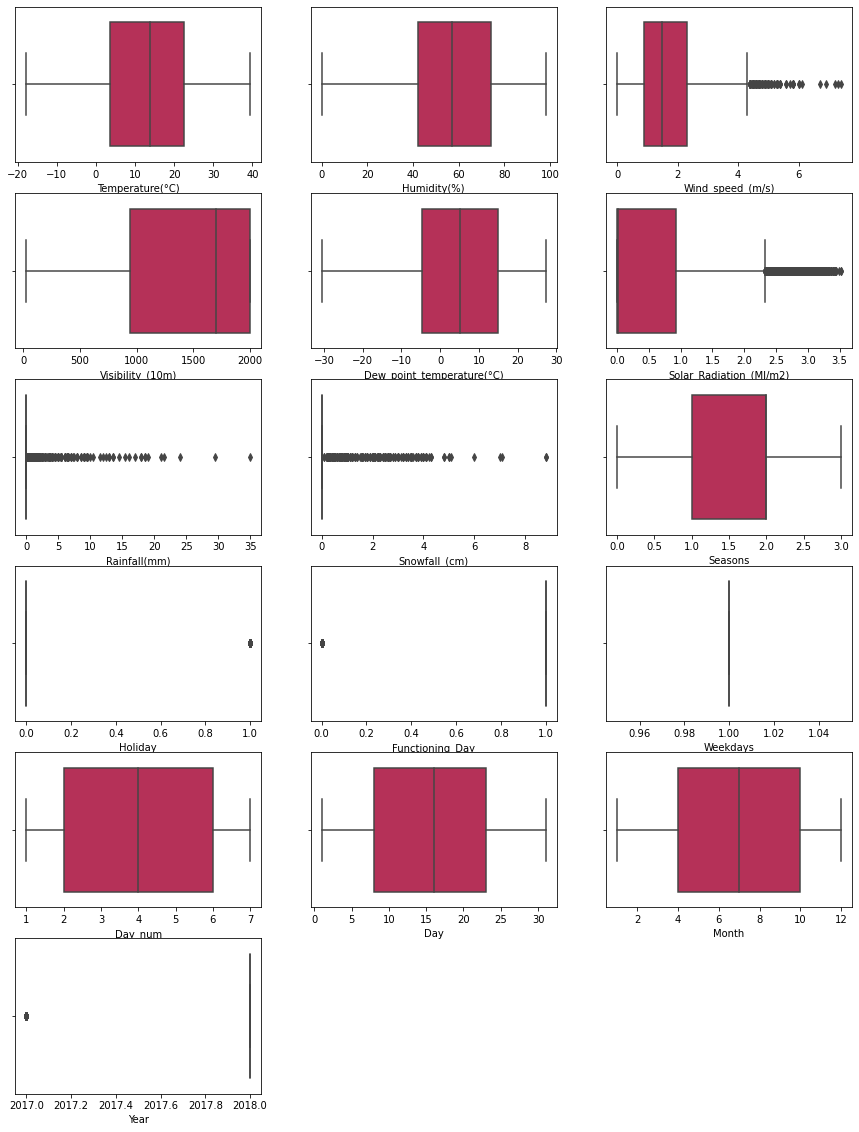

In [46]:
count=1
plt.subplots(figsize=(15, 20))
for i in columns[2:]:
    ax=plt.subplot(6,3,count)
    sns.boxplot(x=df[i],ax=ax,palette="rocket")

    count+=1

plt.show()

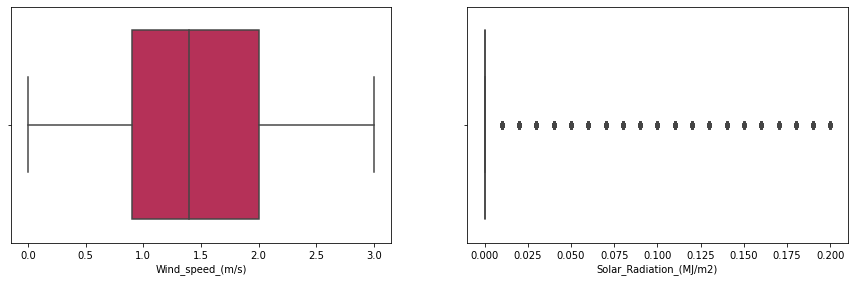

In [47]:
plt.subplots(figsize=(15, 20))

a = np.where(df["Wind_speed_(m/s)"]>3.)
df.drop(a[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,1)
sns.boxplot(x=df["Wind_speed_(m/s)"],ax=ax,palette="rocket")


a = np.where(df["Solar_Radiation_(MJ/m2)"]>.2)
df.drop(a[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,2)
sns.boxplot(x=df["Solar_Radiation_(MJ/m2)"],ax=ax,palette="rocket")


#a = np.where(df_new[""]>300)
#df_new.drop(a[0], inplace = True)
#df_new = df_new.reset_index(drop=True)
#ax=plt.subplot(4,2,3)
#sns.boxplot(x=df_new["Low"],ax=ax,palette="rocket")

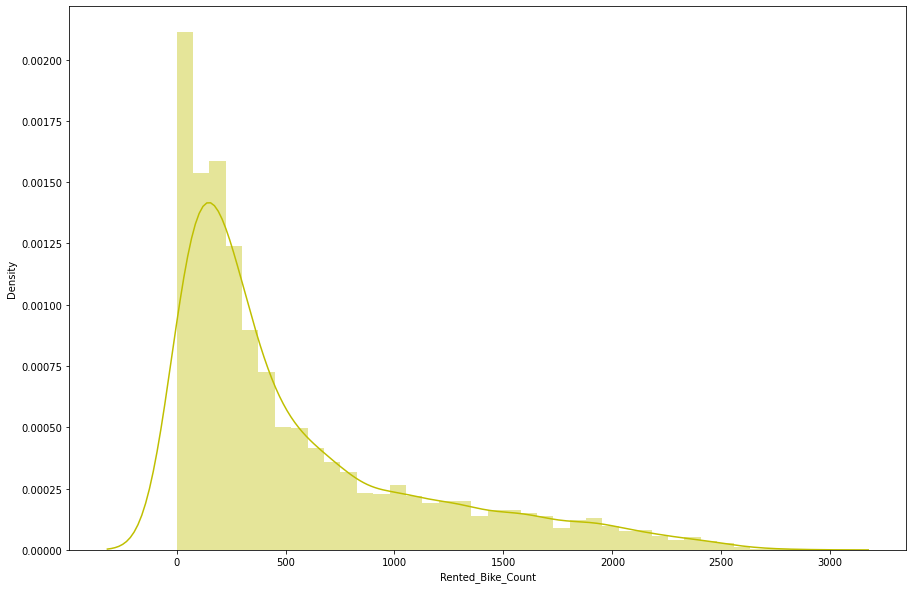

In [48]:
# Dependent variable 'Rented_Bike_Count'
plt.figure(figsize=(15,10))
sns.distplot(df['Rented_Bike_Count'],color="y")

###Correlation matrix(Heat map)

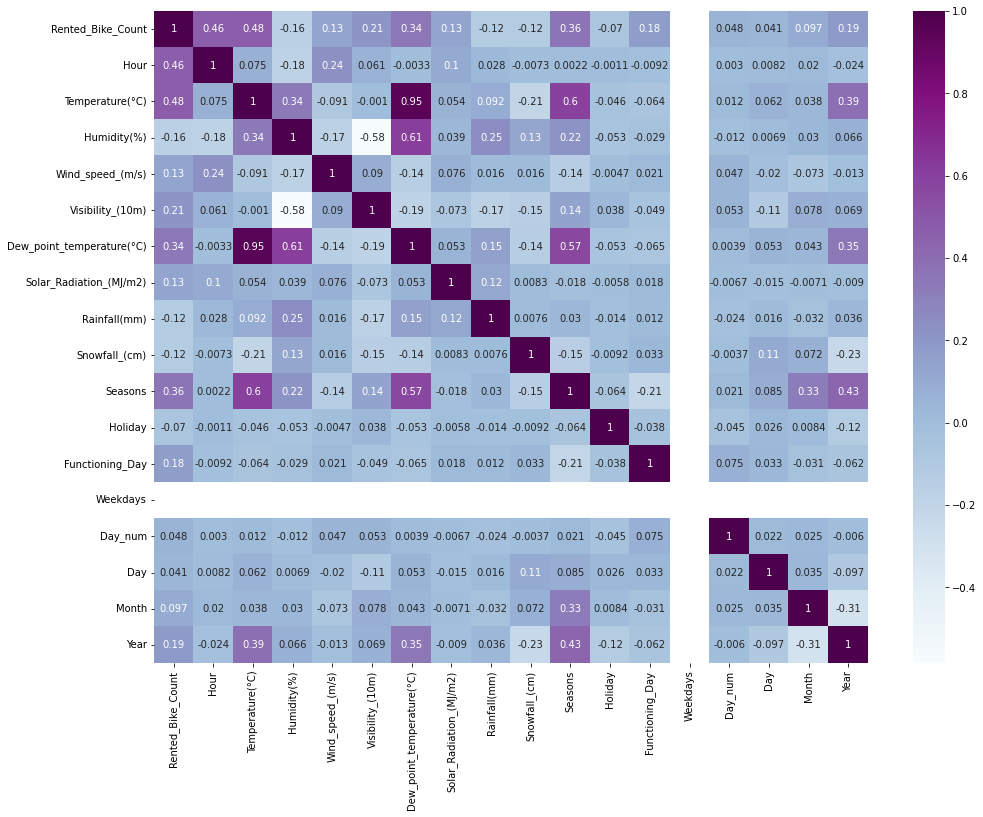

In [49]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.savefig('heatmap.jpg')

In [50]:
columns = df.describe().columns
columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)', 'Seasons',
       'Holiday', 'Functioning_Day', 'Weekdays', 'Day_num', 'Day', 'Month',
       'Year'],
      dtype='object')

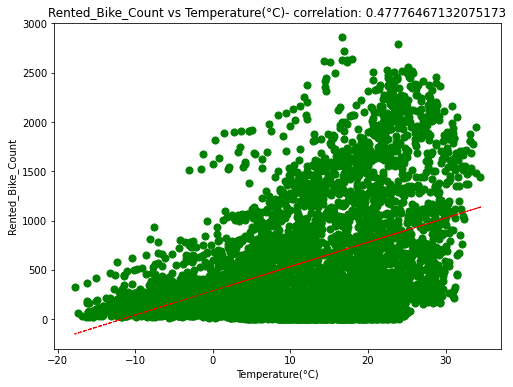

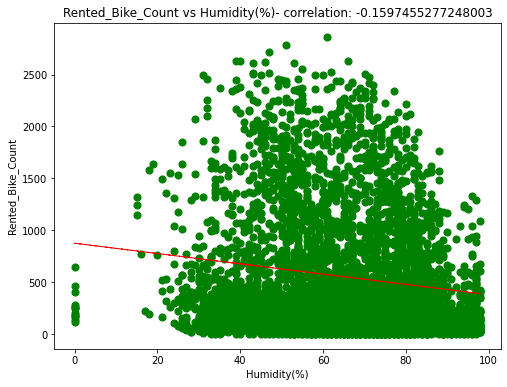

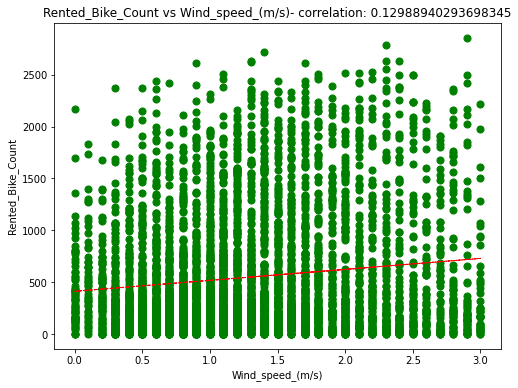

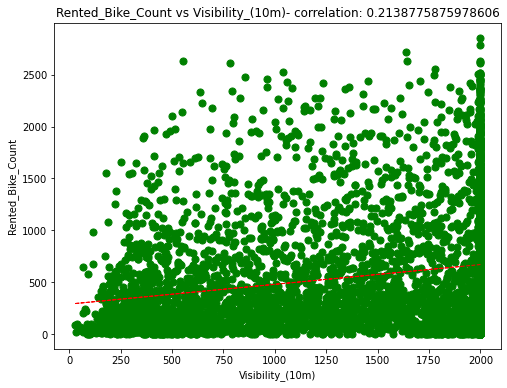

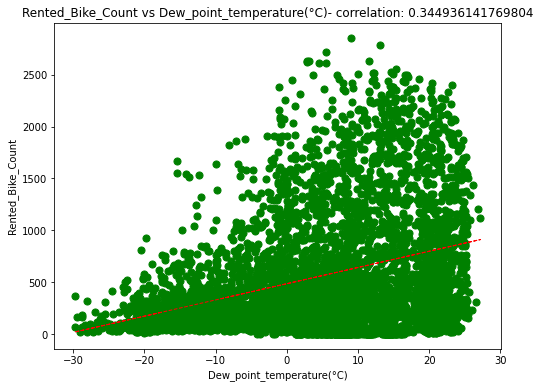

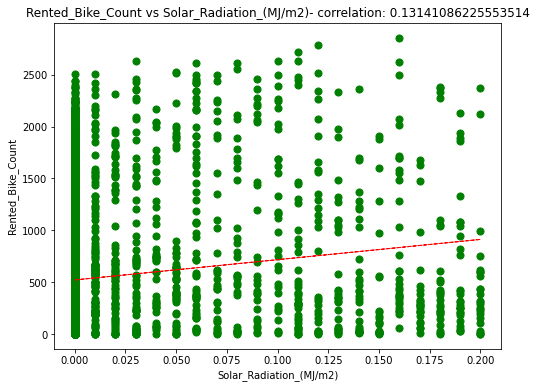

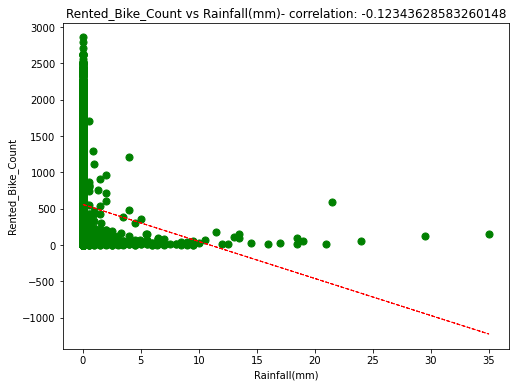

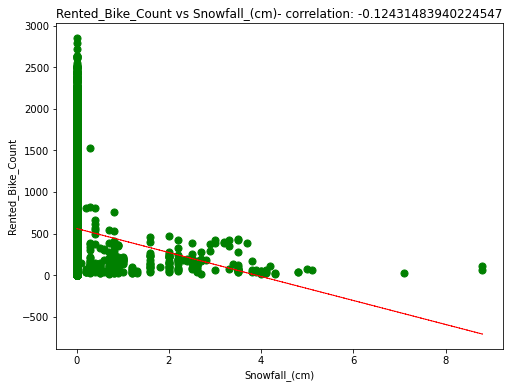

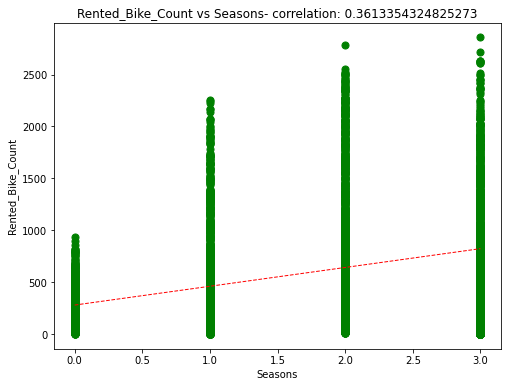

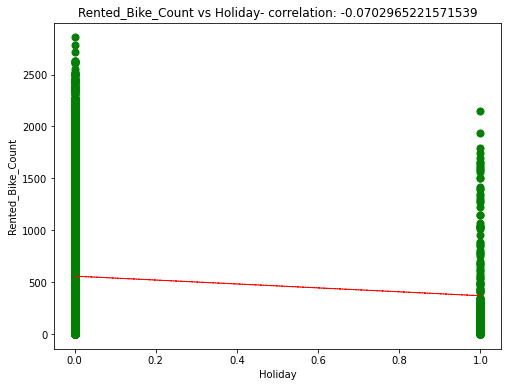

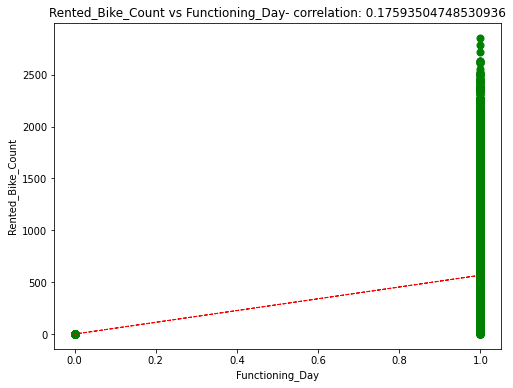

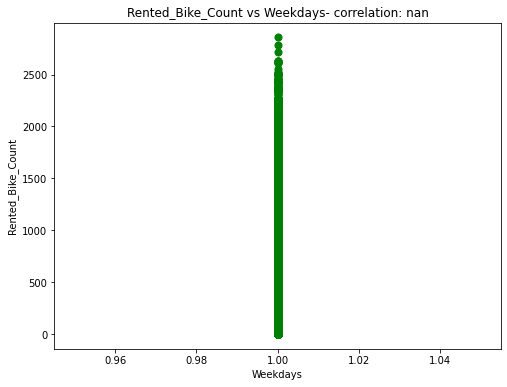

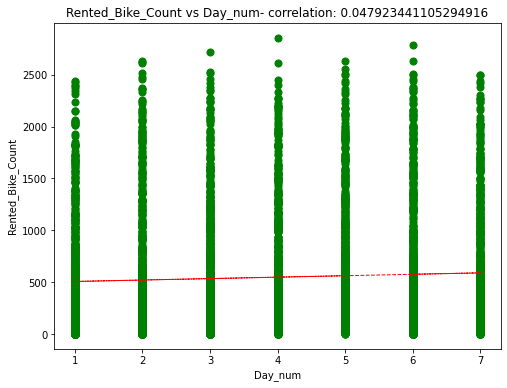

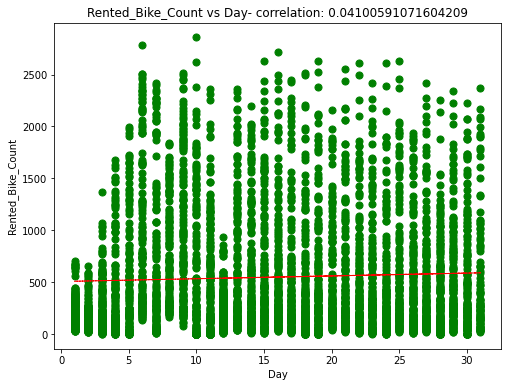

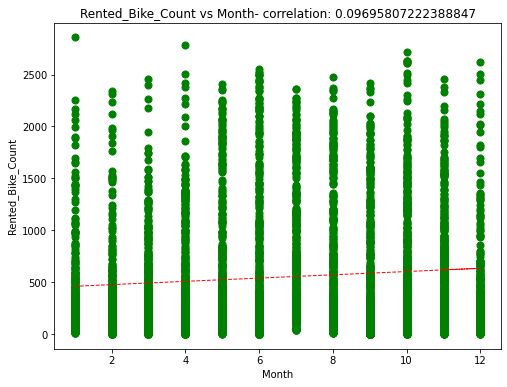

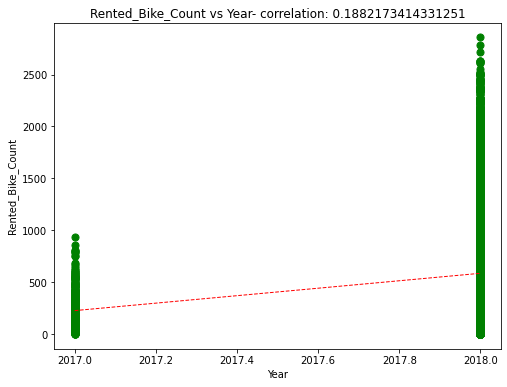

In [51]:
for col in columns[2:]:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    
    feature = df[col]
    
    label = df['Rented_Bike_Count']
    
    correlation = feature.corr(label)
    
    plt.scatter(x=feature, y=label, s=50, color = "g",)
    
    plt.xlabel(col)
    
    plt.ylabel('Rented_Bike_Count')
    
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    
    z = np.polyfit(df[col], df['Rented_Bike_Count'], 1)
    
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)
plt.show()

###Spliting train and test dataset

In [52]:
Y = df['Rented_Bike_Count']
X = df.drop('Rented_Bike_Count', axis = 1)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [54]:
Y.head(10)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
9    555
Name: Rented_Bike_Count, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .30,
                                                    random_state = 50)

##Implementing Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)

In [58]:
model.score(x_train, y_train)

0.5801102484798659

In [59]:
model.coef_

array([ 2.45679468e+01,  2.05154867e+01, -8.47987663e+00,  4.31015014e+01,
        1.97694082e-02,  3.34805468e+00,  1.24296059e+03, -5.50170629e+01,
        4.02578653e+01,  1.12958308e+02, -1.05462626e+02,  7.77441546e+02,
        1.53477231e-12,  2.56664150e+00, -1.44666836e+00, -1.34830657e+00,
       -8.18040494e+01])

In [60]:
model.intercept_

164716.26220099142

In [61]:
y_pred = (model.predict(x_test))

In [62]:
y_pred_train = model.predict(x_train)

In [63]:
y_pred[:5]

array([ 752.9146242 ,  468.92692144, 1184.58628705,  966.80319375,
        -90.35609175])

In [64]:
y_test

3057     381
898      103
3741    1710
2057     905
815      107
        ... 
3964       0
4166    2716
3495     281
3885     335
4576     402
Name: Rented_Bike_Count, Length: 1453, dtype: int64

In [65]:
y_train

1676     107
3384    1681
3848     261
736      376
2024    1382
        ... 
3330     345
70       334
132       96
2014    1215
1931    1209
Name: Rented_Bike_Count, Length: 3390, dtype: int64

In [66]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred)
print("Intercept is ",round(model.intercept_,2))
print("Coefficient is is ",model.coef_)
print("Mean square error of the linear regression model is",round(mean_squared_error(y_test, y_pred),2))
print("R2 square of Training data is",round(R2_train,2))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((x_train.shape[0]-1)/(x_train.shape[0]-x_test.shape[1]-1)),2))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),2))

Intercept is  164716.26
Coefficient is is  [ 2.45679468e+01  2.05154867e+01 -8.47987663e+00  4.31015014e+01
  1.97694082e-02  3.34805468e+00  1.24296059e+03 -5.50170629e+01
  4.02578653e+01  1.12958308e+02 -1.05462626e+02  7.77441546e+02
  1.53477231e-12  2.56664150e+00 -1.44666836e+00 -1.34830657e+00
 -8.18040494e+01]
Mean square error of the linear regression model is 141645.17
R2 square of Training data is 0.58
R2 square Testing data is 0.57
Adjusted R2 for training :  0.58
Adjusted R2 for testing :  0.56


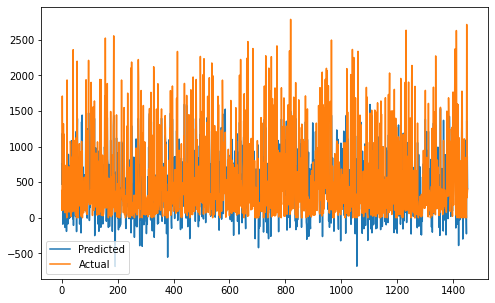

In [67]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Random Forest Regression

In [68]:
model_rf = RandomForestRegressor(n_estimators= 100, criterion= 'mse')

In [69]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
print(model_rf.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


In [71]:
model_rf.score(x_train, y_train)

0.9856046239527018

In [72]:
y_pred_rf = (model_rf.predict(x_test))

In [73]:
y_pred_train_rf = model_rf.predict(x_train)

In [74]:
R2_train = r2_score(y_train, y_pred_train_rf)
R2_test = r2_score(y_test, y_pred_rf)
print("Mean square error of the random forest regression model is",round(mean_squared_error(y_test, y_pred_rf),2))
print("R2 square of Training data is",round(R2_train,2))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((x_train.shape[0]-1)/(x_train.shape[0]-x_test.shape[1]-1)),2))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),2))

Mean square error of the random forest regression model is 29772.29
R2 square of Training data is 0.99
R2 square Testing data is 0.91
Adjusted R2 for training :  0.99
Adjusted R2 for testing :  0.91


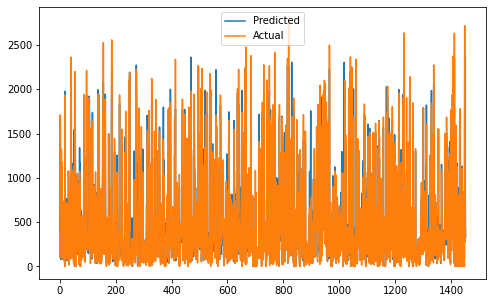

In [75]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_rf))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Cross Validation

In [76]:
cv = cross_validate(model, x_train, y_train, cv = 10)

In [77]:
cv

{'fit_time': array([0.010144  , 0.00435591, 0.00406384, 0.01053548, 0.00412297,
        0.00406551, 0.00410223, 0.00401092, 0.00404406, 0.00392938]),
 'score_time': array([0.00201821, 0.00185704, 0.00180793, 0.00205064, 0.00182462,
        0.00179505, 0.00183034, 0.00188375, 0.00184035, 0.00180221]),
 'test_score': array([0.50129986, 0.52853637, 0.57755853, 0.59265928, 0.63194828,
        0.54937213, 0.50285449, 0.59761218, 0.60209985, 0.60413131])}

In [78]:
y_pred_cv = model.predict(x_test)

In [79]:
y_train_pred_cv = model.predict(x_train)

In [80]:
R2_train = r2_score(y_train, y_train_pred_cv)
R2_test = r2_score(y_test, y_pred_cv)
print("Mean square error of the random forest regression model is",round(mean_squared_error(y_test, y_pred_cv),2))
print("R2 square of Testing data is",round(R2_train,2))
print("R2 square Testing data is",round(R2_test,2))
print("Adjusted R2 for training : ",round(1-(1-R2_train)*((x_train.shape[0]-1)/(x_train.shape[0]-x_test.shape[1]-1)),2))
print("Adjusted R2 for testing : ",round(1-(1-R2_test)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),2))

Mean square error of the random forest regression model is 141645.17
R2 square of Testing data is 0.58
R2 square Testing data is 0.57
Adjusted R2 for training :  0.58
Adjusted R2 for testing :  0.56


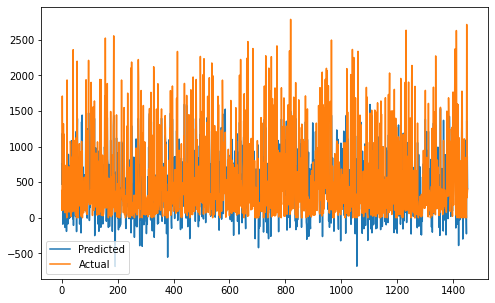

In [82]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_cv))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()